In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
# to upload and read data in google colab
import re
import io
from google.colab import files
from google.colab import drive
# for graph and plottings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(palette = "rainbow")
%matplotlib inline
# NLP preprocessing
import string
import nltk
# for tokenizing
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# for stop words
!pip install PySastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
uploaded = files.upload()

Saving cmp_id.csv to cmp_id.csv


###Data Exploration

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cmp_id.csv']), sep = ';');
df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

                                          translated  score  
0  Surat kabar lokal yang terhormat, menurut saya...      8  
1  Sayang, saya percaya bahwa menggunakan kompute...      9  
2  Sayang, Semakin banyak orang menggunakan kompu...      7  
3  Koran Lokal yang terhormat, Saya telah menemuk...     10  
4  Sayang, saya tahu memiliki komputer memiliki e...      8

In [ ]:
df.describe()

essay_id     essay_set         score
count  12977.000000  12977.000000  12977.000000
mean   10295.414426      4.179471      6.799723
std     6308.831351      2.136831      8.970558
min        1.000000      1.000000      0.000000
25%     4439.000000      2.000000      2.000000
50%    10045.000000      4.000000      3.000000
75%    15681.000000      6.000000      8.000000
max    21633.000000      8.000000     60.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   essay_id    12977 non-null  int64 
 1   essay_set   12977 non-null  int64 
 2   essay       12977 non-null  object
 3   translated  12977 non-null  object
 4   score       12977 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 507.0+ KB


In [ ]:
df.shape

(12977, 5)

<Axes: xlabel='essay_set', ylabel='Count'>

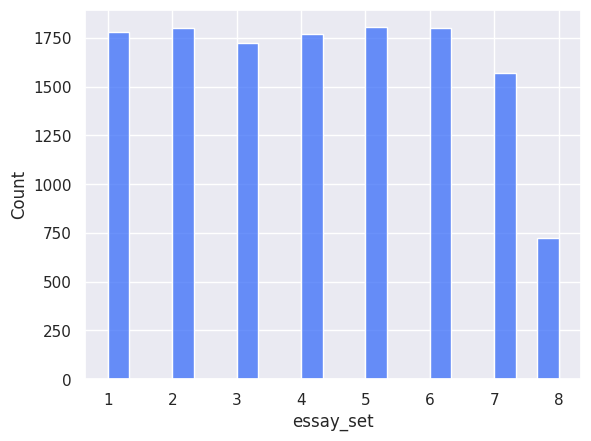

In [ ]:
sns.histplot(df['essay_set'])

In [ ]:
df1 = df.loc[df['essay_set'] == 1]
df2 = df.loc[df['essay_set'] == 2]
df3 = df.loc[df['essay_set'] == 3]
df4 = df.loc[df['essay_set'] == 4]
df5 = df.loc[df['essay_set'] == 5]
df6 = df.loc[df['essay_set'] == 6]
df7 = df.loc[df['essay_set'] == 7]
df8 = df.loc[df['essay_set'] == 8]

<ipython-input-9-72f197dcea4e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concatenated)


<Axes: xlabel='score', ylabel='Density'>

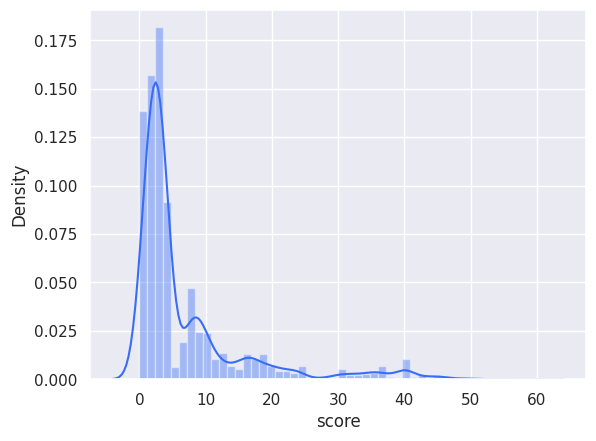

In [ ]:
# Plot skewness
concatenated = pd.concat([df1['score'], df2['score'], df3['score'], df4['score'], df5['score'], df6['score'], df7['score'], df8['score']])
sns.distplot(concatenated)

In [ ]:
# normalise score distribution
min_range1 = min(df1['score'])
max_range1 = max(df1['score'])
min_range2 = min(df2['score'])
max_range2 = max(df2['score'])
min_range3 = min(df3['score'])
max_range3 = max(df3['score'])
min_range4 = min(df4['score'])
max_range4 = max(df4['score'])
min_range5 = min(df5['score'])
max_range5 = max(df5['score'])
min_range6 = min(df6['score'])
max_range6 = max(df6['score'])
min_range7 = min(df7['score'])
max_range7 = max(df7['score'])
min_range8 = min(df8['score'])
max_range8 = max(df8['score'])

def normalize(x,mi,ma):
    x = (x-mi)/(ma-mi)
    return x

df1['Normalised']=df1.apply(lambda x:normalize(x['score'],min_range1,max_range1),axis=1)
df2['Normalised']=df2.apply(lambda x:normalize(x['score'],min_range2,max_range2),axis=1)
df3['Normalised']=df3.apply(lambda x:normalize(x['score'],min_range3,max_range3),axis=1)
df4['Normalised']=df4.apply(lambda x:normalize(x['score'],min_range4,max_range4),axis=1)
df5['Normalised']=df5.apply(lambda x:normalize(x['score'],min_range5,max_range5),axis=1)
df6['Normalised']=df6.apply(lambda x:normalize(x['score'],min_range6,max_range6),axis=1)
df7['Normalised']=df7.apply(lambda x:normalize(x['score'],min_range7,max_range7),axis=1)
df8['Normalised']=df8.apply(lambda x:normalize(x['score'],min_range8,max_range8),axis=1)

<ipython-input-10-dbbdca882ae1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normalised']=df1.apply(lambda x:normalize(x['score'],min_range1,max_range1),axis=1)
<ipython-input-10-dbbdca882ae1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Normalised']=df2.apply(lambda x:normalize(x['score'],min_range2,max_range2),axis=1)
<ipython-input-10-dbbdca882ae1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

<ipython-input-11-667bc280e7f3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concat_normal)


<Axes: xlabel='Normalised', ylabel='Density'>

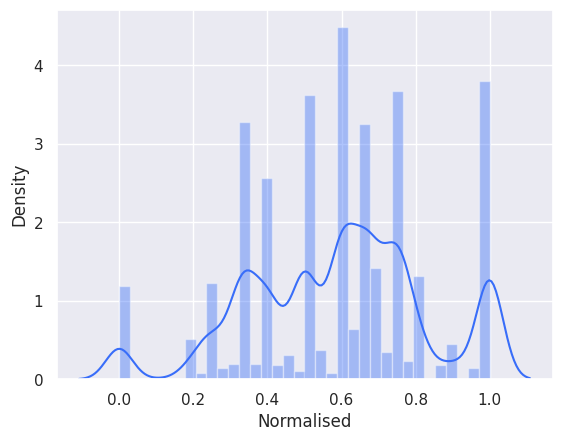

In [ ]:
# Plot skewness
concat_normal = pd.concat([df1['Normalised'], df2['Normalised'], df3['Normalised'], df4['Normalised'], df5['Normalised'], df6['Normalised'], df7['Normalised'], df8['Normalised']])
sns.distplot(concat_normal)

In [ ]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8]
df = pd.concat(frames)
df.describe()

essay_id     essay_set         score    Normalised
count  12977.000000  12977.000000  12977.000000  12977.000000
mean   10295.414426      4.179471      6.799723      0.589161
std     6308.831351      2.136831      8.970558      0.240135
min        1.000000      1.000000      0.000000      0.000000
25%     4439.000000      2.000000      2.000000      0.400000
50%    10045.000000      4.000000      3.000000      0.600000
75%    15681.000000      6.000000      8.000000      0.750000
max    21633.000000      8.000000     60.000000      1.000000

In [ ]:
df.isnull().sum()

essay_id      0
essay_set     0
essay         0
translated    0
score         0
Normalised    0
dtype: int64

In [ ]:
# dropping unnecessary columns
df.drop(['essay','score'],axis=1,inplace=True)
df.head()

essay_id  essay_set                                         translated  \
0         1          1  Surat kabar lokal yang terhormat, menurut saya...   
1         2          1  Sayang, saya percaya bahwa menggunakan kompute...   
2         3          1  Sayang, Semakin banyak orang menggunakan kompu...   
3         4          1  Koran Lokal yang terhormat, Saya telah menemuk...   
4         5          1  Sayang, saya tahu memiliki komputer memiliki e...   

   Normalised  
0         0.6  
1         0.7  
2         0.5  
3         0.8  
4         0.6

###NLP Preprocessing

In [ ]:
# case folding
def casefold(essay):
  essay = essay.lower()
  return essay

df['CleanAnswer'] = df['translated'].apply(lambda x:casefold(x))

In [ ]:
# remove symbols, punctuations, numbers, whitespace
def numremove(essay):
  essay = re.sub(r"\d+", "", essay)
  return essay

df['CleanAnswer'] = df['CleanAnswer'].apply(lambda x:numremove(x))

def puncremove(essay):
  essay = essay.translate(str.maketrans("","",string.punctuation))
  return essay

df['CleanAnswer'] = df['CleanAnswer'].apply(lambda x:puncremove(x))

def wspaceremove(essay):
  essay = essay.strip()
  return essay

df['CleanAnswer'] = df['CleanAnswer'].apply(lambda x:wspaceremove(x))

def mwspaceremove(essay):
  essay = re.sub('\s+',' ',essay)
  return essay

df['CleanAnswer'] = df['CleanAnswer'].apply(lambda x:mwspaceremove(x))

In [ ]:
# stemming
Factory = StemmerFactory()
Stemmer = Factory.create_stemmer()
def stem(essay):
  essay = Stemmer.stem(essay)
  return essay

df['Stem'] = df['CleanAnswer'].apply(lambda x:stem(x))

In [ ]:
uploadsw = files.upload()

Saving id.stopwords.txt to id.stopwords.txt


In [ ]:
sw = pd.read_csv(io.BytesIO(uploadsw['id.stopwords.txt']), sep = '/t');
sw.head()

<ipython-input-19-f530c7069461>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sw = pd.read_csv(io.BytesIO(uploadsw['id.stopwords.txt']), sep = '/t');


IDNStopwordsLists
0               ada
1            adalah
2            adanya
3            adapun
4              agak

In [ ]:
sw_set = set(sw['IDNStopwordsLists'])
sw_set

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# remove stop words & tokenize
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay)
    filtered_sentence = []
    for w in word_tokens:
        if w not in sw_set:
            filtered_sentence.append(w)
    return filtered_sentence

df['Tokens'] = df['Stem'].apply(lambda x:remove_stop_words(x))
df.head()

essay_id  essay_set                                         translated  \
0         1          1  Surat kabar lokal yang terhormat, menurut saya...   
1         2          1  Sayang, saya percaya bahwa menggunakan kompute...   
2         3          1  Sayang, Semakin banyak orang menggunakan kompu...   
3         4          1  Koran Lokal yang terhormat, Saya telah menemuk...   
4         5          1  Sayang, saya tahu memiliki komputer memiliki e...   

   Normalised                                        CleanAnswer  \
0         0.6  surat kabar lokal yang terhormat menurut saya ...   
1         0.7  sayang saya percaya bahwa menggunakan komputer...   
2         0.5  sayang semakin banyak orang menggunakan komput...   
3         0.8  koran lokal yang terhormat saya telah menemuka...   
4         0.6  sayang saya tahu memiliki komputer memiliki ef...   

                                                Stem  \
0  surat kabar lokal yang hormat turut saya efek ...   
1  sayang saya percaya bahwa guna komputer akan u...   
2  sayang makin banyak orang guna komputer tetapi...   
3  koran lokal yang hormat saya telah temu bahwa ...   
4  sayang saya tahu milik komputer milik efek pos...   

                                              Tokens  
0  [surat, kabar, lokal, hormat, efek, milik, kom...  
1  [sayang, percaya, komputer, untung, bicara, te...  
2  [sayang, orang, komputer, orang, tuju, manfaat...  
3  [koran, lokal, hormat, temu, ahli, komputer, m...  
4  [sayang, milik, komputer, milik, efek, positif...

In [ ]:
# count num of words
def noOfWords(essay):
    word=len(essay.split())
    return word
# count num of characters
def noOfChar(essay):
    char=len(essay)
    return char
# count average word length
def avg_word_len(essay):
    try:
      return float(noOfChar(essay))/float(noOfWords(essay))
    except ZeroDivisionError as err:
      return 0

pro_data = df.copy()
pro_data['char_count'] = pro_data['CleanAnswer'].apply(noOfChar)
pro_data['word_count'] = pro_data['CleanAnswer'].apply(noOfWords)
pro_data['avg_word_len'] = pro_data['CleanAnswer'].apply(avg_word_len)

In [ ]:
uploadrw = files.upload()

Saving id.allwords.txt to id.allwords.txt


In [ ]:
data = open('id.allwords.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count

pro_data['spell_err_count'] = pro_data['Stem'].apply(check_spell_error)
pro_data.head()

essay_id  essay_set                                         translated  \
0         1          1  Surat kabar lokal yang terhormat, menurut saya...   
1         2          1  Sayang, saya percaya bahwa menggunakan kompute...   
2         3          1  Sayang, Semakin banyak orang menggunakan kompu...   
3         4          1  Koran Lokal yang terhormat, Saya telah menemuk...   
4         5          1  Sayang, saya tahu memiliki komputer memiliki e...   

   Normalised                                        CleanAnswer  \
0         0.6  surat kabar lokal yang terhormat menurut saya ...   
1         0.7  sayang saya percaya bahwa menggunakan komputer...   
2         0.5  sayang semakin banyak orang menggunakan komput...   
3         0.8  koran lokal yang terhormat saya telah menemuka...   
4         0.6  sayang saya tahu memiliki komputer memiliki ef...   

                                                Stem  \
0  surat kabar lokal yang hormat turut saya efek ...   
1  sayang saya percaya bahwa guna komputer akan u...   
2  sayang makin banyak orang guna komputer tetapi...   
3  koran lokal yang hormat saya telah temu bahwa ...   
4  sayang saya tahu milik komputer milik efek pos...   

                                              Tokens  char_count  word_count  \
0  [surat, kabar, lokal, hormat, efek, milik, kom...        2064         303   
1  [sayang, percaya, komputer, untung, bicara, te...        2539         363   
2  [sayang, orang, komputer, orang, tuju, manfaat...        3428         479   
3  [koran, lokal, hormat, temu, ahli, komputer, m...        3243         448   
4  [sayang, milik, komputer, milik, efek, positif...        2766         389   

   avg_word_len  spell_err_count  
0      6.811881               17  
1      6.994490               16  
2      7.156576                8  
3      7.238839               31  
4      7.110540               16

In [ ]:
def to_str(essay):
  essay = str(essay)
  return essay

def to_int(x):
  y = int(x)
  return y

pro_data['Stem'] = pro_data['Stem'].apply(to_str)
pro_data.head()

essay_id  essay_set                                         translated  \
0         1          1  Surat kabar lokal yang terhormat, menurut saya...   
1         2          1  Sayang, saya percaya bahwa menggunakan kompute...   
2         3          1  Sayang, Semakin banyak orang menggunakan kompu...   
3         4          1  Koran Lokal yang terhormat, Saya telah menemuk...   
4         5          1  Sayang, saya tahu memiliki komputer memiliki e...   

   Normalised                                        CleanAnswer  \
0         0.6  surat kabar lokal yang terhormat menurut saya ...   
1         0.7  sayang saya percaya bahwa menggunakan komputer...   
2         0.5  sayang semakin banyak orang menggunakan komput...   
3         0.8  koran lokal yang terhormat saya telah menemuka...   
4         0.6  sayang saya tahu memiliki komputer memiliki ef...   

                                                Stem  \
0  surat kabar lokal yang hormat turut saya efek ...   
1  sayang saya percaya bahwa guna komputer akan u...   
2  sayang makin banyak orang guna komputer tetapi...   
3  koran lokal yang hormat saya telah temu bahwa ...   
4  sayang saya tahu milik komputer milik efek pos...   

                                              Tokens  char_count  word_count  \
0  [surat, kabar, lokal, hormat, efek, milik, kom...        2064         303   
1  [sayang, percaya, komputer, untung, bicara, te...        2539         363   
2  [sayang, orang, komputer, orang, tuju, manfaat...        3428         479   
3  [koran, lokal, hormat, temu, ahli, komputer, m...        3243         448   
4  [sayang, milik, komputer, milik, efek, positif...        2766         389   

   avg_word_len  spell_err_count  
0      6.811881               17  
1      6.994490               16  
2      7.156576                8  
3      7.238839               31  
4      7.110540               16

In [ ]:
pro_data = pro_data.drop(pro_data[pro_data.word_count < 5].index)
pro_data = pro_data.drop(pro_data[pro_data.CleanAnswer  == 'name'].index)

In [ ]:
pro_df = pro_data.loc[(pro_data != 0).any(1)]

<ipython-input-27-1cf7913fbdd3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  pro_df = pro_data.loc[(pro_data != 0).any(1)]


In [ ]:
#Saving processed df to a file
drive.mount('/drive')
pro_df.to_csv("/drive/My Drive/CMP/Preprocessed_data_ID.csv")

Mounted at /drive


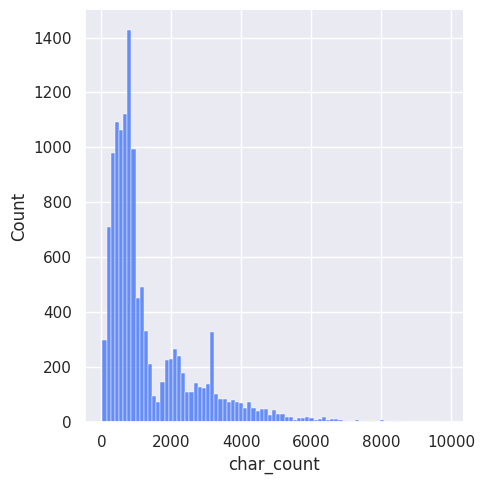

In [ ]:
sns.displot(pro_df['char_count'])

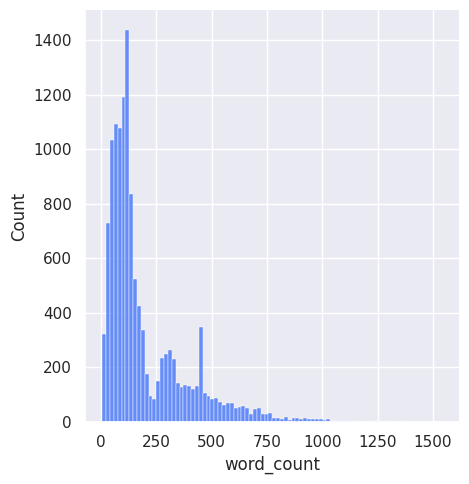

In [ ]:
sns.displot(pro_df['word_count'])

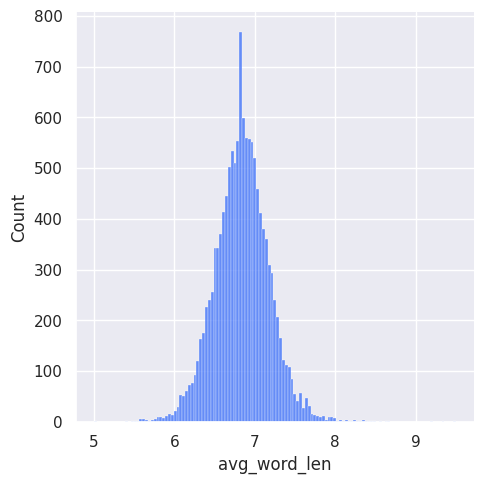

In [ ]:
sns.displot(pro_df['avg_word_len'])

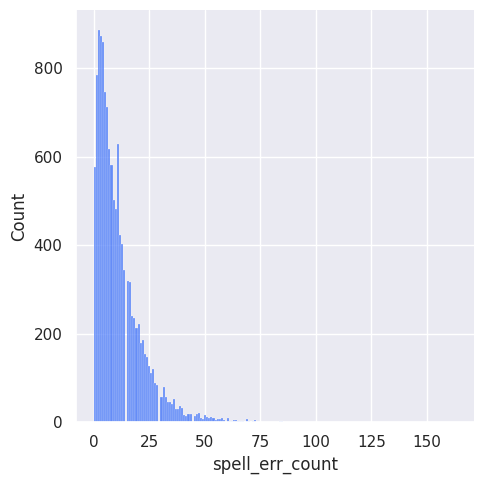

In [ ]:
sns.displot(pro_df['spell_err_count'])

<ipython-input-33-09e5cf0ab4c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pro_df.corr())


<Axes: >

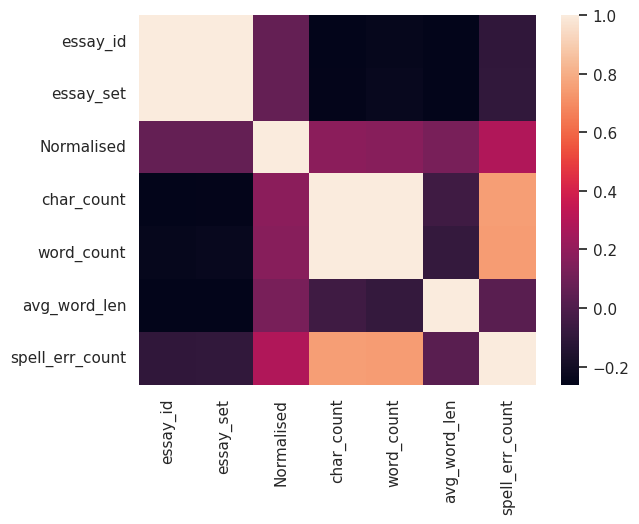

In [ ]:
# correlation heatmap
sns.heatmap(pro_df.corr())